#Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Loading the dataset

In [ ]:
df = pd.read_csv("data(1).csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Preprocessing

In [ ]:
df.loc[:, df.columns.str.contains('Unnamed')]

,Unnamed: 32
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
564,NaN
565,NaN
566,NaN
567,NaN


In [ ]:
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis']= (df['diagnosis'] == 'M').astype(int)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
df = df.drop('id', axis= 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Exploratory Analysis of dataset

In [116]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


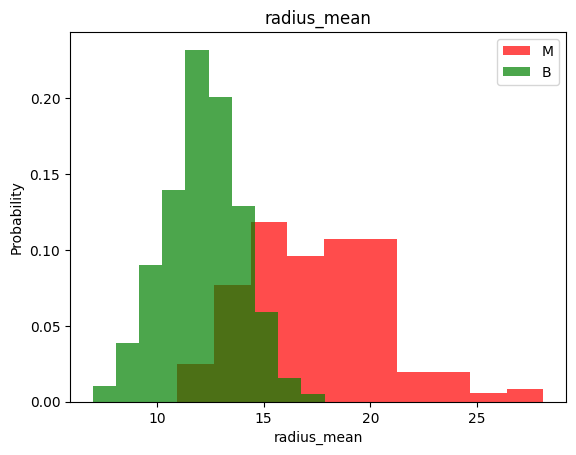

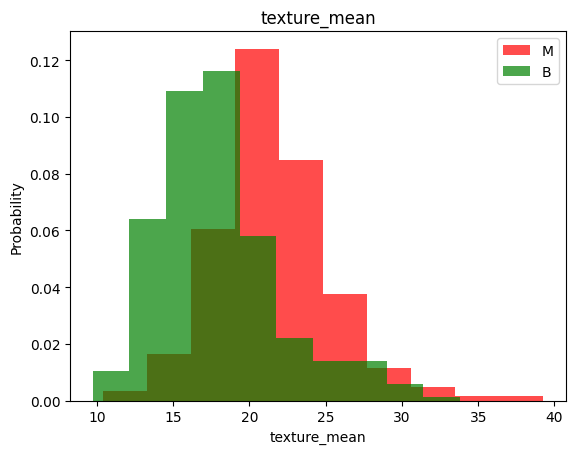

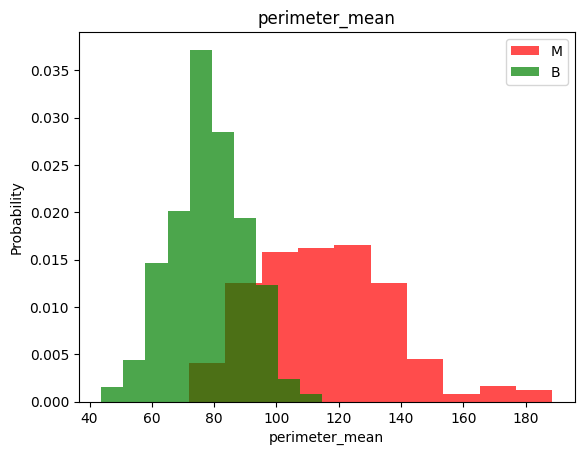

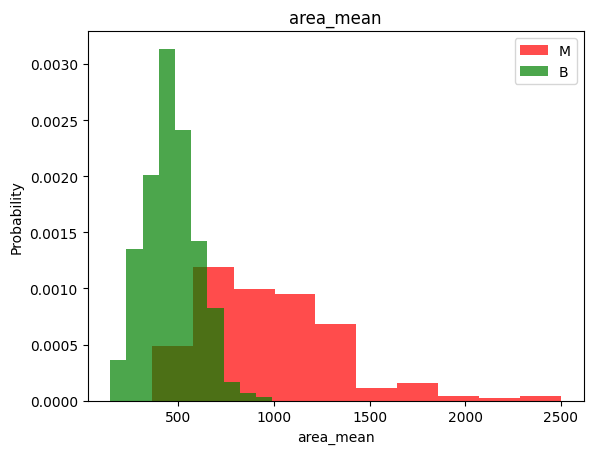

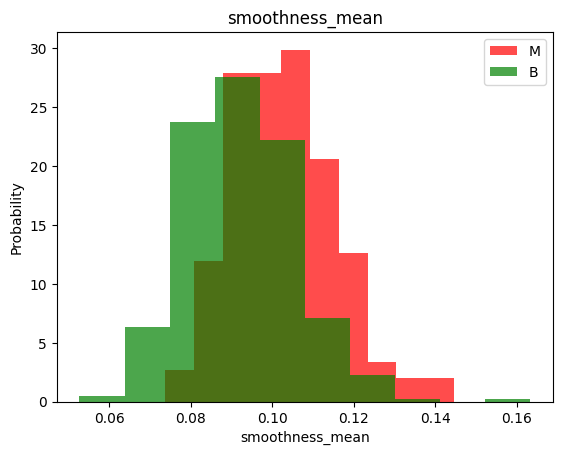

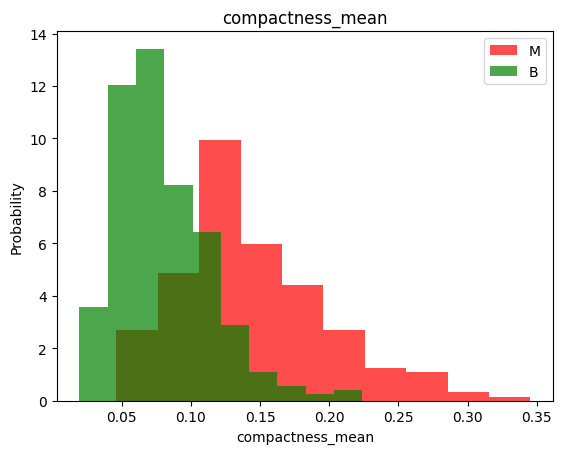

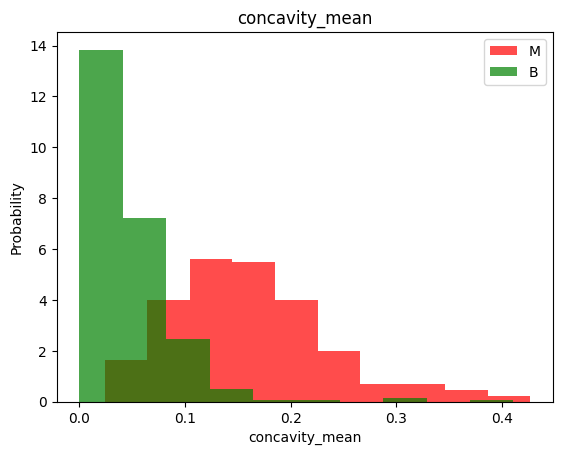

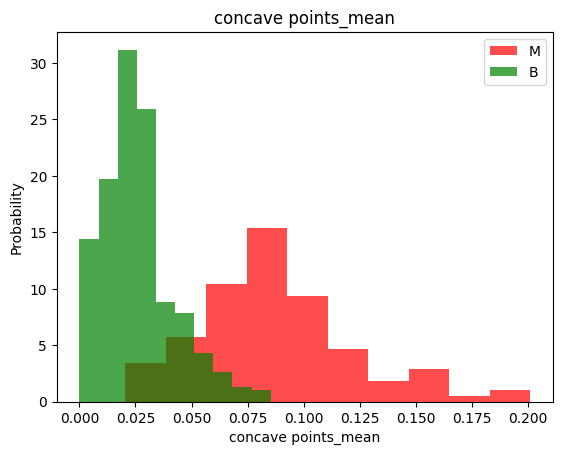

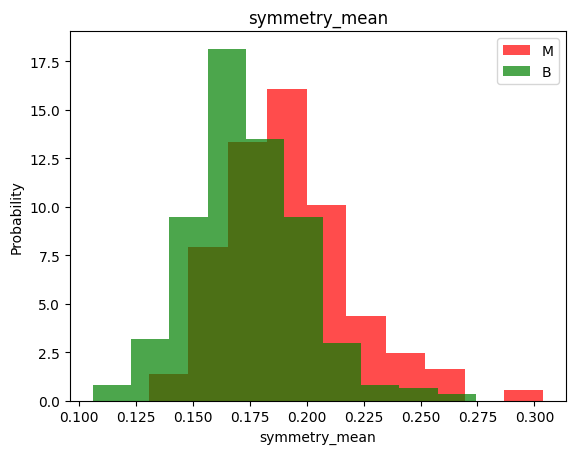

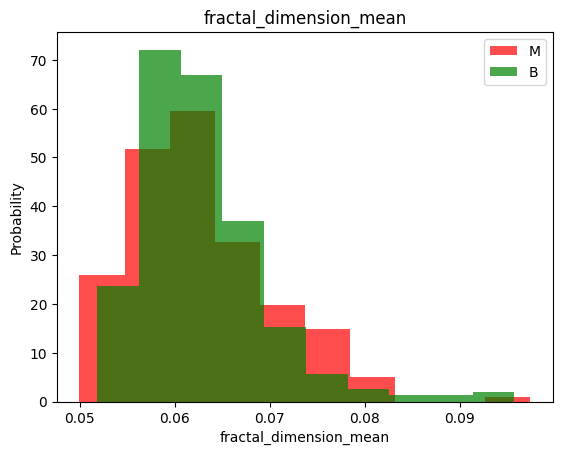

In [117]:
for label in df.columns[1:11]:
  plt.hist(df[df['diagnosis']==1][label], color = 'red', label ='M', alpha = 0.7, density = True)
  plt.hist(df[df['diagnosis']==0][label], color = 'green', label ='B', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [118]:
df.columns[1:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#Training, Validation, Testing Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
263,1,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,...,17.91,31.67,115.9,988.6,0.10840,0.1807,0.2260,0.08568,0.2683,0.06829
535,1,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,...,24.30,25.48,160.2,1809.0,0.12680,0.3135,0.4433,0.21480,0.3077,0.07569
290,0,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,...,15.77,22.13,101.7,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
156,1,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,...,20.47,25.11,132.9,1302.0,0.14180,0.3498,0.3583,0.15150,0.2463,0.07738
369,1,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,27.66,25.80,195.0,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310
399,0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,...,13.45,24.49,86.0,562.0,0.12440,0.1726,0.1449,0.05356,0.2779,0.08121
526,0,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,...,15.35,25.16,101.9,719.8,0.16240,0.3124,0.2654,0.14270,0.3518,0.08665
122,1,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  sc= MinMaxScaler()
  x =sc.fit_transform(x)

  if oversample:
    ros= RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y, (len(y), 1))))

  return data, x, y


In [ ]:
train, x_tr, y_tr = scale_dataset(train, True)
valid, x_vd, y_vd = scale_dataset(valid)
test, x_ts, y_ts = scale_dataset(test)

#Feature Selection

In [ ]:
select_feature = SelectKBest(chi2, k=10).fit(x_tr, y_tr)
select_feature.scores_

array([1.80356577e+01, 6.22659964e+00, 1.91228786e+01, 2.06344396e+01,
       2.88979617e+00, 1.79968867e+01, 3.29459304e+01, 3.75299477e+01,
       2.86958519e+00, 9.39917910e-03, 1.32123601e+01, 7.39678926e-04,
       1.19741070e+01, 1.44719016e+01, 2.85639797e-01, 4.33502962e+00,
       2.58463781e+00, 5.70688937e+00, 9.23245663e-03, 2.69813279e-01,
       2.78562163e+01, 6.52926721e+00, 3.00979886e+01, 3.00876313e+01,
       5.25830378e+00, 1.64576728e+01, 2.17804201e+01, 3.38905630e+01,
       4.21921268e+00, 3.81076679e+00])

In [ ]:
X_tr=select_feature.transform(x_tr)
X_vd=select_feature.transform(x_vd)
X_ts=select_feature.transform(x_ts)

#Model classification

##kNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_tr, y_tr)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_ts)

In [ ]:
print(classification_report(y_ts, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88        69
           1       0.77      0.96      0.85        45

    accuracy                           0.87       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.89      0.87      0.87       114



##Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_tr, y_tr)

In [ ]:
y_pred_nb = nb_model.predict(X_ts)

In [ ]:
print(classification_report(y_ts, y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        69
           1       0.75      0.96      0.84        45

    accuracy                           0.86       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.86      0.86       114



##Support VM

In [106]:
svm_model = SVC()
svm_model = svm_model.fit(X_tr, y_tr)

In [107]:
y_pred_svm = svm_model.predict(X_ts)

In [108]:
print(classification_report(y_ts, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        69
           1       0.75      0.96      0.84        45

    accuracy                           0.86       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.86      0.86       114



##Logistic Regression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_tr, y_tr)

In [ ]:
y_pred_lg = lg_model.predict(X_ts)

In [ ]:
print(classification_report(y_ts, y_pred_lg))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        69
           1       0.75      0.96      0.84        45

    accuracy                           0.86       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.86      0.86       114



##Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_tr, y_tr)

In [114]:
y_pred_dt = dt_model.predict(X_ts)

In [115]:
print(classification_report(y_ts, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        69
           1       0.83      0.98      0.90        45

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



##Random Forest

In [109]:
rf_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf_model = rf_model.fit(X_tr, y_tr)

In [112]:
y_pred_rf = rf_model.predict(X_ts)

In [113]:
print(classification_report(y_ts, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        69
           1       0.81      0.96      0.88        45

    accuracy                           0.89       114
   macro avg       0.89      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114

